In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
linkedin_df=pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.csv')

C:\Users\I. OGHENEMARHO\AppData\Local\Temp\ipykernel_7040\908579593.py:1: DtypeWarning: Columns (78,80) have mixed types. Specify dtype option on import or set low_memory=False.
  linkedin_df=pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.csv')


In [3]:
linkedin_df.shape

(7760, 147)

In [4]:
#check duplicates
if linkedin_df.duplicated().any():
    print('There are duplicates in dataframe.')
else:
    print('There are no duplicates in the Dataframe')
    

There are no duplicates in the Dataframe


In [5]:
#find missing column values
linkedin_df.isnull().sum()/len(linkedin_df)*100


Date                         0.000000
Post ID                      0.000000
Network                      0.000000
Post Type                    0.000000
Content Type                 0.000000
                              ...    
Card Impressions           100.000000
Card Teaser Impressions    100.000000
Card Teaser Clicks         100.000000
Poll Votes                  99.974227
Tags                        78.865979
Length: 147, dtype: float64

In [6]:
threshold =0.8 * len(linkedin_df)
empty_column=linkedin_df.columns[linkedin_df.isnull().sum()>threshold]
linkedin_df.drop(empty_column,axis=1,inplace=True)

In [7]:
linkedin_df.shape

(7760, 21)

In [8]:
linkedin_df.columns

Index(['Date', 'Post ID', 'Network', 'Post Type', 'Content Type', 'Profile',
       'Sent by', 'Link', 'Post', 'Impressions', 'Organic Impressions',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Post Clicks (All)', 'Tags'],
      dtype='object')

In [9]:
linkedin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              7760 non-null   object 
 1   Post ID                           7760 non-null   int64  
 2   Network                           7760 non-null   object 
 3   Post Type                         7760 non-null   object 
 4   Content Type                      7760 non-null   object 
 5   Profile                           7760 non-null   object 
 6   Sent by                           7760 non-null   object 
 7   Link                              7756 non-null   object 
 8   Post                              7729 non-null   object 
 9   Impressions                       6332 non-null   object 
 10  Organic Impressions               6332 non-null   object 
 11  Engagement Rate (per Impression)  6332 non-null   object 
 12  Engage

In [10]:
column_to_clean=['Impressions', 'Organic Impressions',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Post Clicks (All)']

In [11]:
def clean_and_convert_to_float(x):
    # If the value is a string, clean it and try to convert it to float
    if isinstance(x, str):
        # Remove single quotes and commas
        x = x.replace("'", '').replace(',', '')
        
        # Remove non-alphanumeric characters and spaces using a Pandas Series method
        x = pd.Series(x).str.replace(r'[^A-Za-z0-9\s.]+', '', regex=True).iloc[0]
        
        # Try to convert to float, and handle potential exceptions
        try:
            return float(x)
        except ValueError:
            return None  # or any other default value
    return x

In [12]:
# Apply the clean_and_convert_to_float function to the specified columns
linkedin_df[column_to_clean] = linkedin_df[column_to_clean].applymap(clean_and_convert_to_float)

In [13]:
linkedin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              7760 non-null   object 
 1   Post ID                           7760 non-null   int64  
 2   Network                           7760 non-null   object 
 3   Post Type                         7760 non-null   object 
 4   Content Type                      7760 non-null   object 
 5   Profile                           7760 non-null   object 
 6   Sent by                           7760 non-null   object 
 7   Link                              7756 non-null   object 
 8   Post                              7729 non-null   object 
 9   Impressions                       6332 non-null   float64
 10  Organic Impressions               6332 non-null   float64
 11  Engagement Rate (per Impression)  6332 non-null   float64
 12  Engage

In [14]:
column_na=['Impressions', 'Organic Impressions',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Post Clicks (All)']
column_mean=linkedin_df[column_na].mean()
# Calculate the mean for each specified column

# Fill NaN values with the respective column mean
linkedin_df[column_na] = linkedin_df[column_na].fillna(column_mean)

In [15]:
linkedin_df.describe()

,Post ID,Impressions,Organic Impressions,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,Click-Through Rate,Post Link Clicks,Post Clicks (All)
count,7.760000e+03,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000,7760.000000
mean,6.689876e+18,1083.303696,1083.303696,7.173716,50.454359,15.752685,15.752685,1.152874,1.407454,1.605938,32.132502,32.132502
std,2.613510e+17,1279.237887,1279.237887,35.504305,182.129005,27.374997,27.374997,7.015201,1.997575,2.407616,164.841474,164.841474
min,5.869022e+18,1.000000,1.000000,0.000000,0.000000,-103.000000,-103.000000,-16.000000,-6.000000,0.000000,0.000000,0.000000
25%,6.485442e+18,534.750000,534.750000,2.070000,13.000000,6.000000,6.000000,0.000000,0.000000,0.690000,4.000000,4.000000
50%,6.718173e+18,944.000000,944.000000,3.045000,26.000000,13.000000,13.000000,0.000000,1.000000,1.260000,11.000000,11.000000
75%,6.907367e+18,1088.250000,1088.250000,6.220000,50.454359,15.752685,15.752685,1.152874,2.000000,1.605938,32.132502,32.132502
max,7.085212e+18,37889.000000,37889.000000,900.000000,6235.000000,957.000000,957.000000,284.000000,26.000000,58.330000,6089.000000,6089.000000


In [16]:
linkedin_df['Date']=pd.to_datetime(linkedin_df['Date']) 

In [17]:
linkedin_df['Hour']=linkedin_df['Date'].apply(lambda time: time.hour)
linkedin_df['Month']=linkedin_df['Date'].apply(lambda time: time.month) #month the post
linkedin_df['Day of week']=linkedin_df['Date'].apply(lambda time: time.dayofweek)#Day of week the post

In [18]:
datemap = {0:'Mon', 1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
linkedin_df['Day of week'] = linkedin_df['Day of week'].map(datemap)

datemap is a dictionary where keys represent numerical values corresponding to days of the week (0 for Monday, 1 for Tuesday, and so on), and values represent the corresponding day abbreviations.

The map function is applied to the 'Day of week' column of the linkedin_df DataFrame. It replaces the numerical values in this column with their corresponding day abbreviations according to the datemap dictionary.

Outcome:

As a result of this code, the 'Day of week' column in inst_df will be transformed to contain day abbreviations instead of numerical values. This can make the data more interpretable and user-friendly, especially when analyzing trends based on days of the week.

In [19]:
linkedin_df['Content Type'].unique()

array(['Photo', 'Text', 'Video', 'Poll', 'Document', 'Link'], dtype=object)

In [20]:
linkedin_df['Content Type'].value_counts()

Photo       6490
Video        924
Text         233
Link         110
Poll           2
Document       1
Name: Content Type, dtype: int64

In [21]:
linkedin_df['Sent by'].unique()

array(['Blessing Ubah', 'Kemi Amoo', ' ', 'Damilare Oyekanmi',
       'Sophia Amuka', 'Aramide Salami', 'Dunni Ogunsanya'], dtype=object)

In [22]:
# Replace '' with 'SMM' in the 'Column_Name' column
linkedin_df['Sent by'] = linkedin_df['Sent by'].replace(' ', 'SMM')

In [23]:

value_counts = linkedin_df['Sent by'].value_counts()
total_count = len(linkedin_df['Sent by'])
percentage_distribution = (value_counts / total_count) * 100

# Print the percentage distribution
print(percentage_distribution)

SMM                  38.324742
Blessing Ubah        31.262887
Sophia Amuka         20.940722
Kemi Amoo             4.342784
Aramide Salami        3.724227
Damilare Oyekanmi     1.250000
Dunni Ogunsanya       0.154639
Name: Sent by, dtype: float64


In [24]:
engagement_summary = (linkedin_df.groupby('Content Type').agg({'Impressions':'mean', 'Organic Impressions':'mean',
       'Engagement Rate (per Impression)':'mean', 'Engagements':'mean', 'Reactions':'mean', 'Likes':'mean',
       'Comments':'mean', 'Shares':'mean', 'Click-Through Rate':'mean', 'Post Link Clicks':'mean',
       'Post Clicks (All)':'mean'}).sort_values(by ='Impressions', ascending = False))

engagement_summary.columns = ['Avg Impressions', 'Avg Organic Impressions',
       'Avg Engagement Rate (per Impression)', 'Avg Engagements', 'Avg Reactions', 'Avg Likes',
       'Avg Comments', 'Avg Shares', 'Avg Click-Through Rate', 'Avg Post Link Clicks',
       'Avg Post Clicks (All)']

engagement_summary



,Avg Impressions,Avg Organic Impressions,Avg Engagement Rate (per Impression),Avg Engagements,Avg Reactions,Avg Likes,Avg Comments,Avg Shares,Avg Click-Through Rate,Avg Post Link Clicks,Avg Post Clicks (All)
Content Type,,,,,,,,,,,
Poll,22357.000000,22357.000000,2.730000,615.000000,15.500000,15.500000,2.500000,0.000000,2.655000,597.000000,597.000000
Text,1459.517564,1459.517564,3.949669,40.023000,11.557155,11.557155,2.308248,0.537280,0.929993,25.619367,25.619367
Document,1438.000000,1438.000000,18.080000,260.000000,9.000000,9.000000,0.000000,0.000000,17.450000,251.000000,251.000000
Video,1240.573352,1240.573352,2.821081,35.826923,16.263475,16.263475,2.696391,1.316622,0.878621,15.489110,15.489110
Link,1161.578984,1161.578984,12.315090,49.649454,15.151904,15.151904,0.872038,2.025286,1.699483,31.593956,31.593956
Photo,1039.468971,1039.468971,7.821708,52.718790,15.841888,15.841888,0.896162,1.441806,1.729406,34.537231,34.537231


In [25]:
engagement_summary_days= (linkedin_df.groupby('Day of week').agg({'Impressions':'mean', 'Organic Impressions':'mean',
       'Engagement Rate (per Impression)':'mean', 'Engagements':'mean', 'Reactions':'mean', 'Likes':'mean',
       'Comments':'mean', 'Shares':'mean', 'Click-Through Rate':'mean', 'Post Link Clicks':'mean',
       'Post Clicks (All)':'mean'}).sort_values(by ='Impressions', ascending = False))

engagement_summary_days.columns = ['Avg Impressions', 'Avg Organic Impressions',
       'Avg Engagement Rate (per Impression)', 'Avg Engagements', 'Avg Reactions', 'Avg Likes',
       'Avg Comments', 'Avg Shares', 'Avg Click-Through Rate', 'Avg Post Link Clicks',
       'Avg Post Clicks (All)']

engagement_summary_days



,Avg Impressions,Avg Organic Impressions,Avg Engagement Rate (per Impression),Avg Engagements,Avg Reactions,Avg Likes,Avg Comments,Avg Shares,Avg Click-Through Rate,Avg Post Link Clicks,Avg Post Clicks (All)
Day of week,,,,,,,,,,,
Thu,1148.606915,1148.606915,8.447723,63.244502,17.062369,17.062369,1.041735,1.335044,1.726891,43.762969,43.762969
Sat,1112.591587,1112.591587,4.546136,51.430082,15.888030,15.888030,0.699290,1.287335,1.632482,33.554789,33.554789
Wed,1112.469191,1112.469191,8.330197,49.333223,15.896170,15.896170,1.731295,1.582847,1.712808,30.120076,30.120076
Fri,1077.847720,1077.847720,5.531484,51.945472,14.854275,14.854275,1.155702,1.407318,1.654018,34.526741,34.526741
Mon,1073.629552,1073.629552,7.255695,42.422567,16.058248,16.058248,1.144804,1.542705,1.466898,23.675527,23.675527
Sun,1053.672786,1053.672786,4.073302,47.279484,14.636277,14.636277,0.918915,1.057989,1.501868,30.665661,30.665661
Tue,982.565986,982.565986,9.060447,47.078164,15.279298,15.279298,0.804436,1.326422,1.444835,29.657967,29.657967


Summary:

The table provides an average of various engagement metrics, including impressions, engagement rate, engagements, reactions, likes, comments, shares, click-through rate, post link clicks, and post clicks (all), grouped by the day of the week.

It appears that engagement metrics, such as average impressions and engagement rate, vary across different days of the week. For instance, Thursdays and Wednesdays seem to have higher average impressions and engagement rates compared to other days.

This analysis can help inform content scheduling and posting strategies, as it provides insights into which days of the week may be more conducive to achieving higher engagement levels on LinkedIn.

In [26]:
hourly_engagement = linkedin_df.groupby('Hour')['Engagement Rate (per Impression)'].mean()
daily_engagement = linkedin_df.groupby('Day of week')['Engagement Rate (per Impression)'].mean()


Text(0, 0.5, 'Average Engagement Rate')

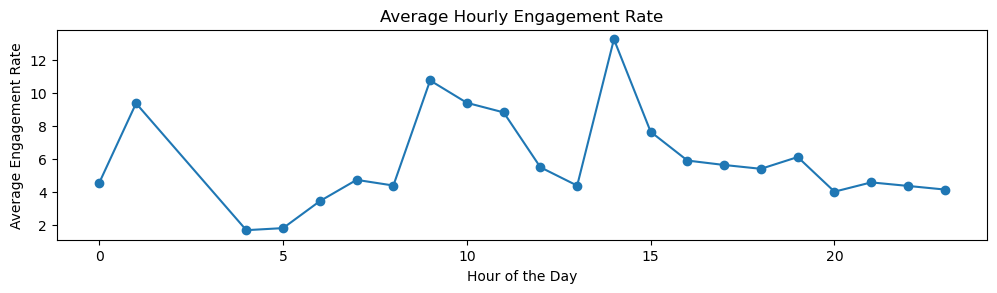

In [27]:
# Peak hours of the day
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
hourly_engagement.plot(kind='line', marker='o')
plt.title('Average Hourly Engagement Rate')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagement Rate')

A clear and informative visualization that allows for the observation of trends in engagement rates throughout the day. Understanding peak engagement hours can help optimize content scheduling and engagement strategies on social media platforms.

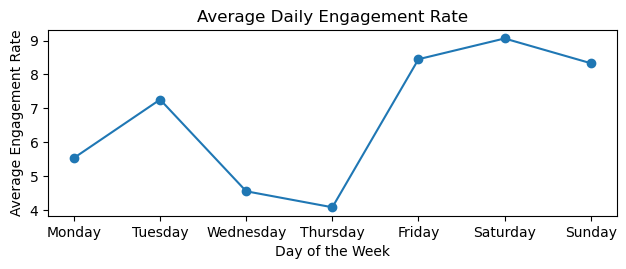

In [28]:
# Peak days of the week
plt.subplot(2, 1, 2)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_engagement.index = days
daily_engagement.plot(kind='line', marker='o')
plt.title('Average Daily Engagement Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Average Engagement Rate')

plt.tight_layout()
plt.show()

Peak Days of the Week: Average Daily Engagement Rate
In this section, we explore the average daily engagement rate across various days of the week. By visualizing these trends, we gain valuable insights into which days are associated with higher or lower average engagement rates on our social media platforms.

Visualization:

Average Daily Engagement Rate

Figure : The line chart above illustrates the average daily engagement rate, with each day of the week represented on the x-axis and the average engagement rate on the y-axis. Circular markers ('o') indicate data points.
Key Observations:

The graph presents a clear picture of how average daily engagement rates vary throughout the week.
Certain days may exhibit higher engagement, while others may show lower engagement levels.

Insights and Recommendations:

Based on the analysis of daily engagement rates, we can derive the following insights and recommendations:

Optimal Posting Days: Identify the days of the week associated with the highest average engagement rates. These days are prime candidates for posting important content or announcements.

Content Planning: Tailor your content strategy to align with the observed engagement patterns. Consider reserving high-impact content for days with historically high engagement.

Testing and Adaptation: Continuously monitor engagement rates and adapt your posting schedule accordingly. Social media trends and audience behavior may evolve, requiring flexibility in your strategy.

Next Steps:

This analysis provides valuable insights into the engagement patterns across days of the week. To further refine our social media strategy, we recommend exploring other factors such as content types, posting times, and user demographics. A comprehensive approach will ensure that our social media efforts remain effective and responsive to changing trends.

For additional visualizations and detailed insights, please refer to the complete report and accompanying documentation.

In [29]:
hourly_Impression = linkedin_df.groupby('Hour')['Impressions'].mean()
daily_Impression = linkedin_df.groupby('Day of week')['Impressions'].mean()

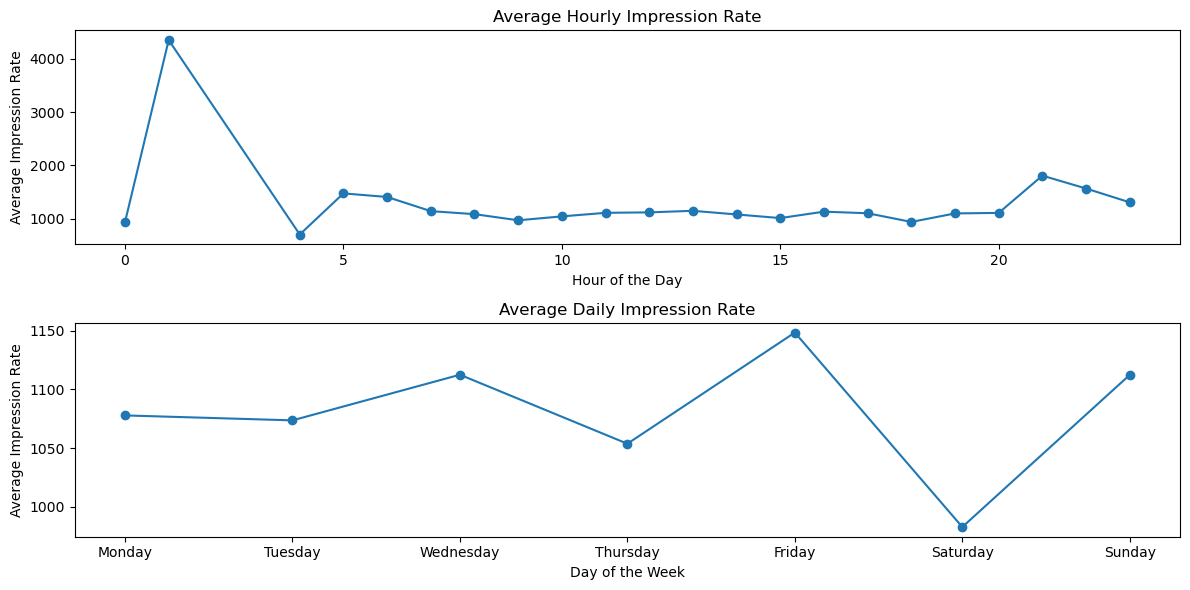

In [30]:
# Peak hours of the day
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
hourly_Impression.plot(kind='line', marker='o')
plt.title('Average Hourly Impression Rate')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Impression Rate')

# Peak days of the week
plt.subplot(2, 1, 2)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_Impression.index = days
daily_Impression.plot(kind='line', marker='o')
plt.title('Average Daily Impression Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Average Impression Rate')

plt.tight_layout()
plt.show()

In [31]:
hourly_click = linkedin_df.groupby('Hour')['Click-Through Rate'].mean()
daily_click = linkedin_df.groupby('Day of week')['Click-Through Rate'].mean()


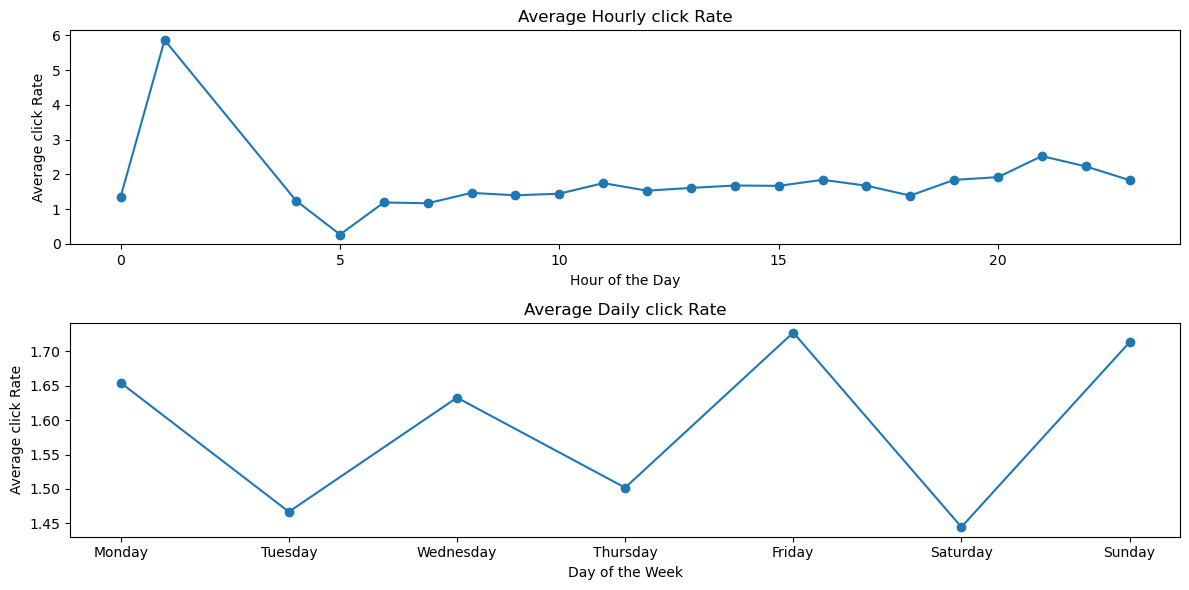

In [33]:
# Peak hours click of the day
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
hourly_click.plot(kind='line', marker='o')
plt.title('Average Hourly click Rate')
plt.xlabel('Hour of the Day')
plt.ylabel('Average click Rate')

# Peak days of the week
plt.subplot(2, 1, 2)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_click.index = days
daily_click.plot(kind='line', marker='o')
plt.title('Average Daily click Rate')
plt.xlabel('Day of the Week')
plt.ylabel('Average click Rate')

plt.tight_layout()
plt.show()

In [35]:
content_type_groups = linkedin_df.groupby(['Content Type', linkedin_df['Hour']])
engagement_by_content_type = content_type_groups['Engagements'].mean().unstack().T


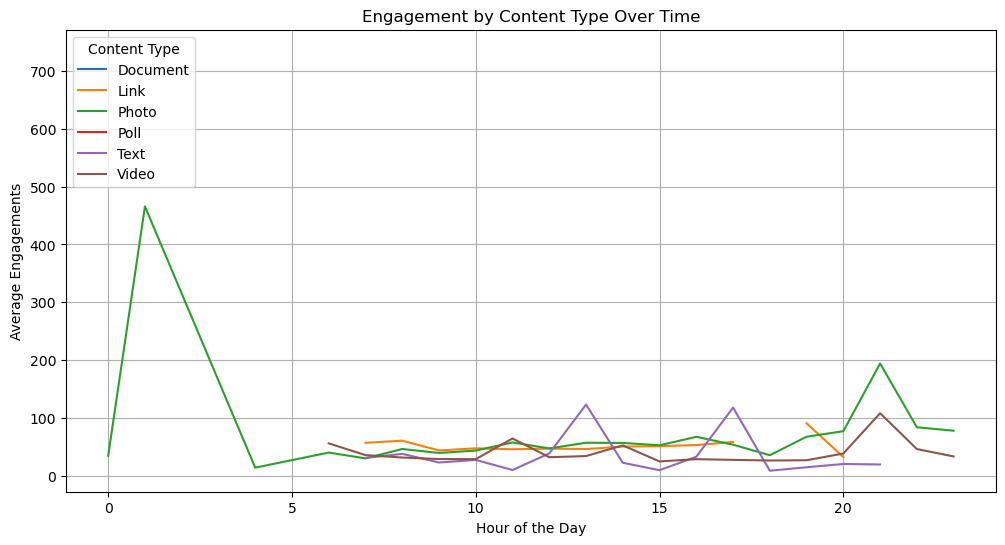

In [36]:

engagement_by_content_type.plot(kind='line', figsize=(12, 6))
plt.title('Engagement by Content Type Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Engagements')
plt.legend(title='Content Type', loc='upper left')
plt.grid(True)
plt.show()


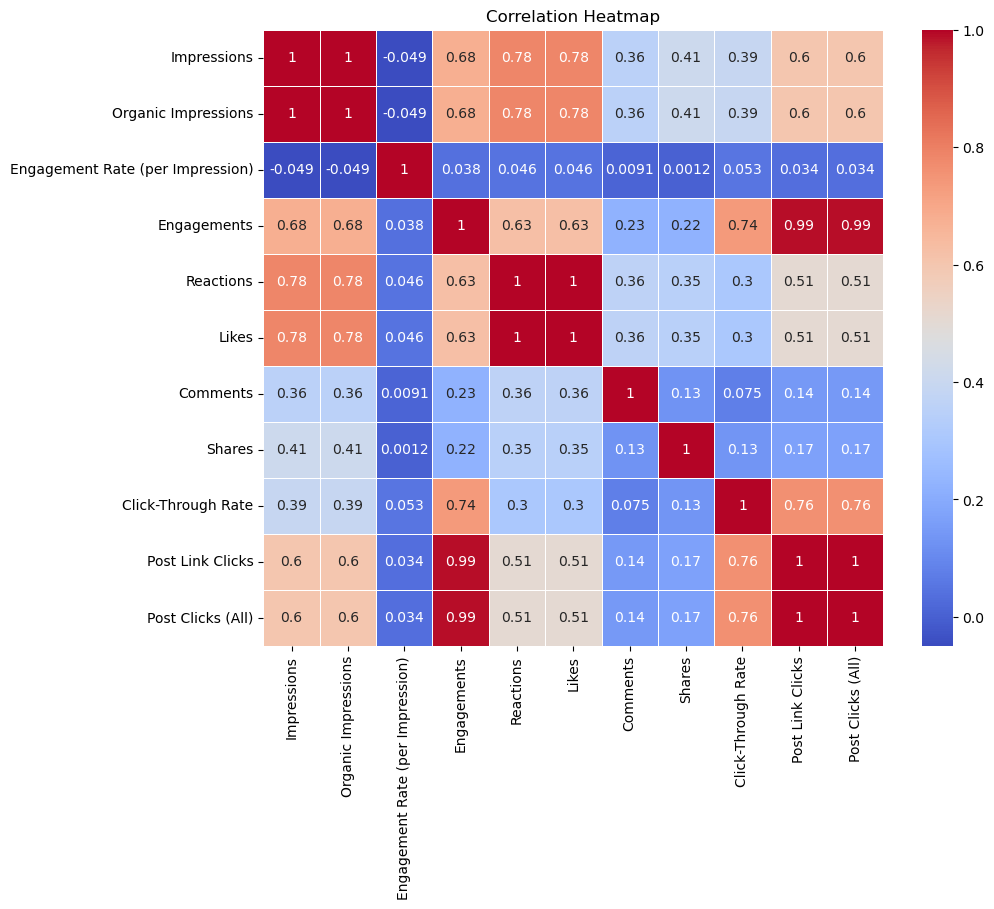

In [40]:
column_to_corr=['Impressions', 'Organic Impressions',
       'Engagement Rate (per Impression)', 'Engagements', 'Reactions', 'Likes',
       'Comments', 'Shares', 'Click-Through Rate', 'Post Link Clicks',
       'Post Clicks (All)']

# Create a correlation matrix
corr_matrix = linkedin_df[column_to_corr].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()